# Montaño Molina Juan Jose

1.- A partir del dataset que se le asigno, desarrollar un modelo de aprendizaje no supervisado con las tecnicas que usted vea conveniente para identificar el numero de clases que corresponde a la clasificacion de las imagenes almacenadas en el dataset asignado, luego debe aplicar un modelo de machine learning para lograr que se pueda identificar el tipo de figura que corresponde a una nueva imagen que se le presente al modelo entrenado.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

In [15]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df_train = pd.read_csv('/content/drive/MyDrive/IA/laboratorios/dataset_13.csv')

# Verificar las columnas del DataFrame original
print("Columnas del DataFrame original:")
print(df_train.columns)

# Seleccionar los primeros 10000 datos del DataFrame
X_train = df_train.head(10000)

# Verificar el DataFrame resultante
print("\nPrimeras filas del DataFrame X_train:")
print(X_train.head())

Columnas del DataFrame original:
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '3062', '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070',
       '3071'],
      dtype='object', length=3072)

Primeras filas del DataFrame X_train:
     0    1    2    3    4    5    6    7    8    9  ...  3062  3063  3064  \
0   30  111  198   30  111  198   30  111  198   30  ...   255   255   255   
1   71   69   47   71   69   47   71   69   47   71  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   3065  3066  3067  3068  3069  3070  3071  
0   255   255   255   255   255   255   255  
1   255   255   255   255   255   255   255  
2   255   255   255   255   255   255   255  
3   255   255   255   255   255   255   255  
4   255   255   255   255   255

In [16]:
# Normalización de las imágenes, asumiendo que todas las columnas contienen datos de píxeles
X_train = X_train / 255.0

# Verificar la normalización
print(X_train.head())
X=X_train

          0         1         2         3         4         5         6  \
0  0.117647  0.435294  0.776471  0.117647  0.435294  0.776471  0.117647   
1  0.278431  0.270588  0.184314  0.278431  0.270588  0.184314  0.278431   
2  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

          7         8         9  ...  3062  3063  3064  3065  3066  3067  \
0  0.435294  0.776471  0.117647  ...   1.0   1.0   1.0   1.0   1.0   1.0   
1  0.270588  0.184314  0.278431  ...   1.0   1.0   1.0   1.0   1.0   1.0   
2  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   
3  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   
4  1.000000  1.000000  1.000000  ...   1.0   1.0   1.0   1.0   1.0   1.0   

   3068  3069  3070  3071  
0   1.0   1.0   1.0   1.0  
1   1.0   1.0   1.0   1.0  
2   1.0 

In [17]:
# Number of clusters for K-Means
k = 50
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_n=X_scaled
# Verificar las dimensiones de los datos
print(X.shape)
print(X_scaled.shape)

(10000, 3072)
(10000, 3072)


In [18]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=42)

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Ajustar K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Calcular la puntuación de silueta
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.03991465108919681


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

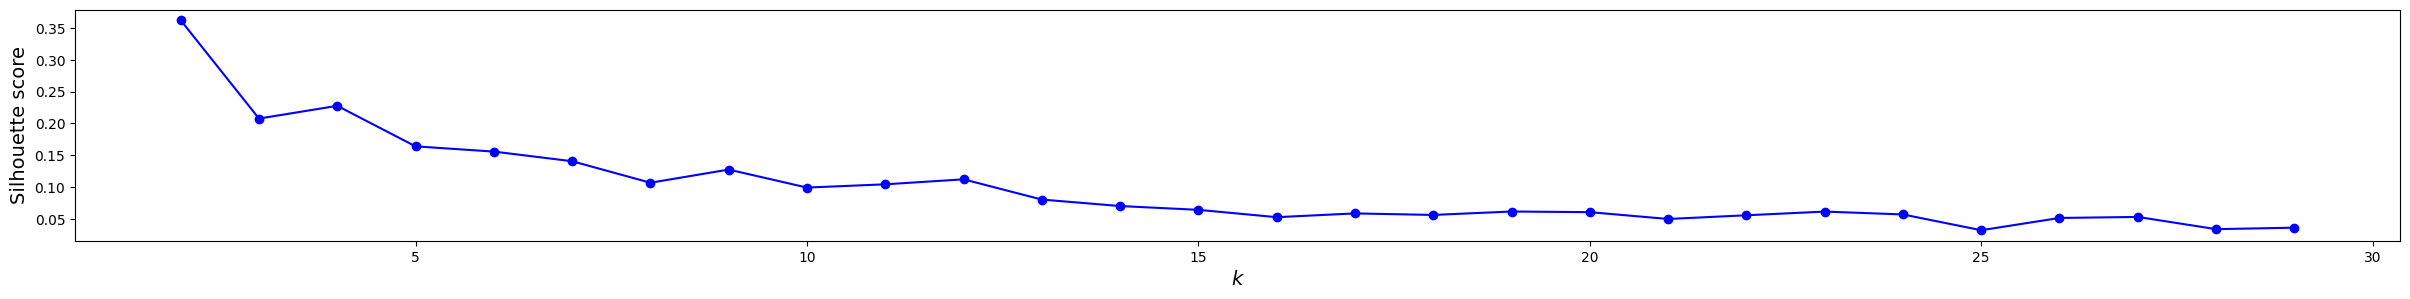

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 30)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(30, 3))
plt.plot(range(2, 30), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [21]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

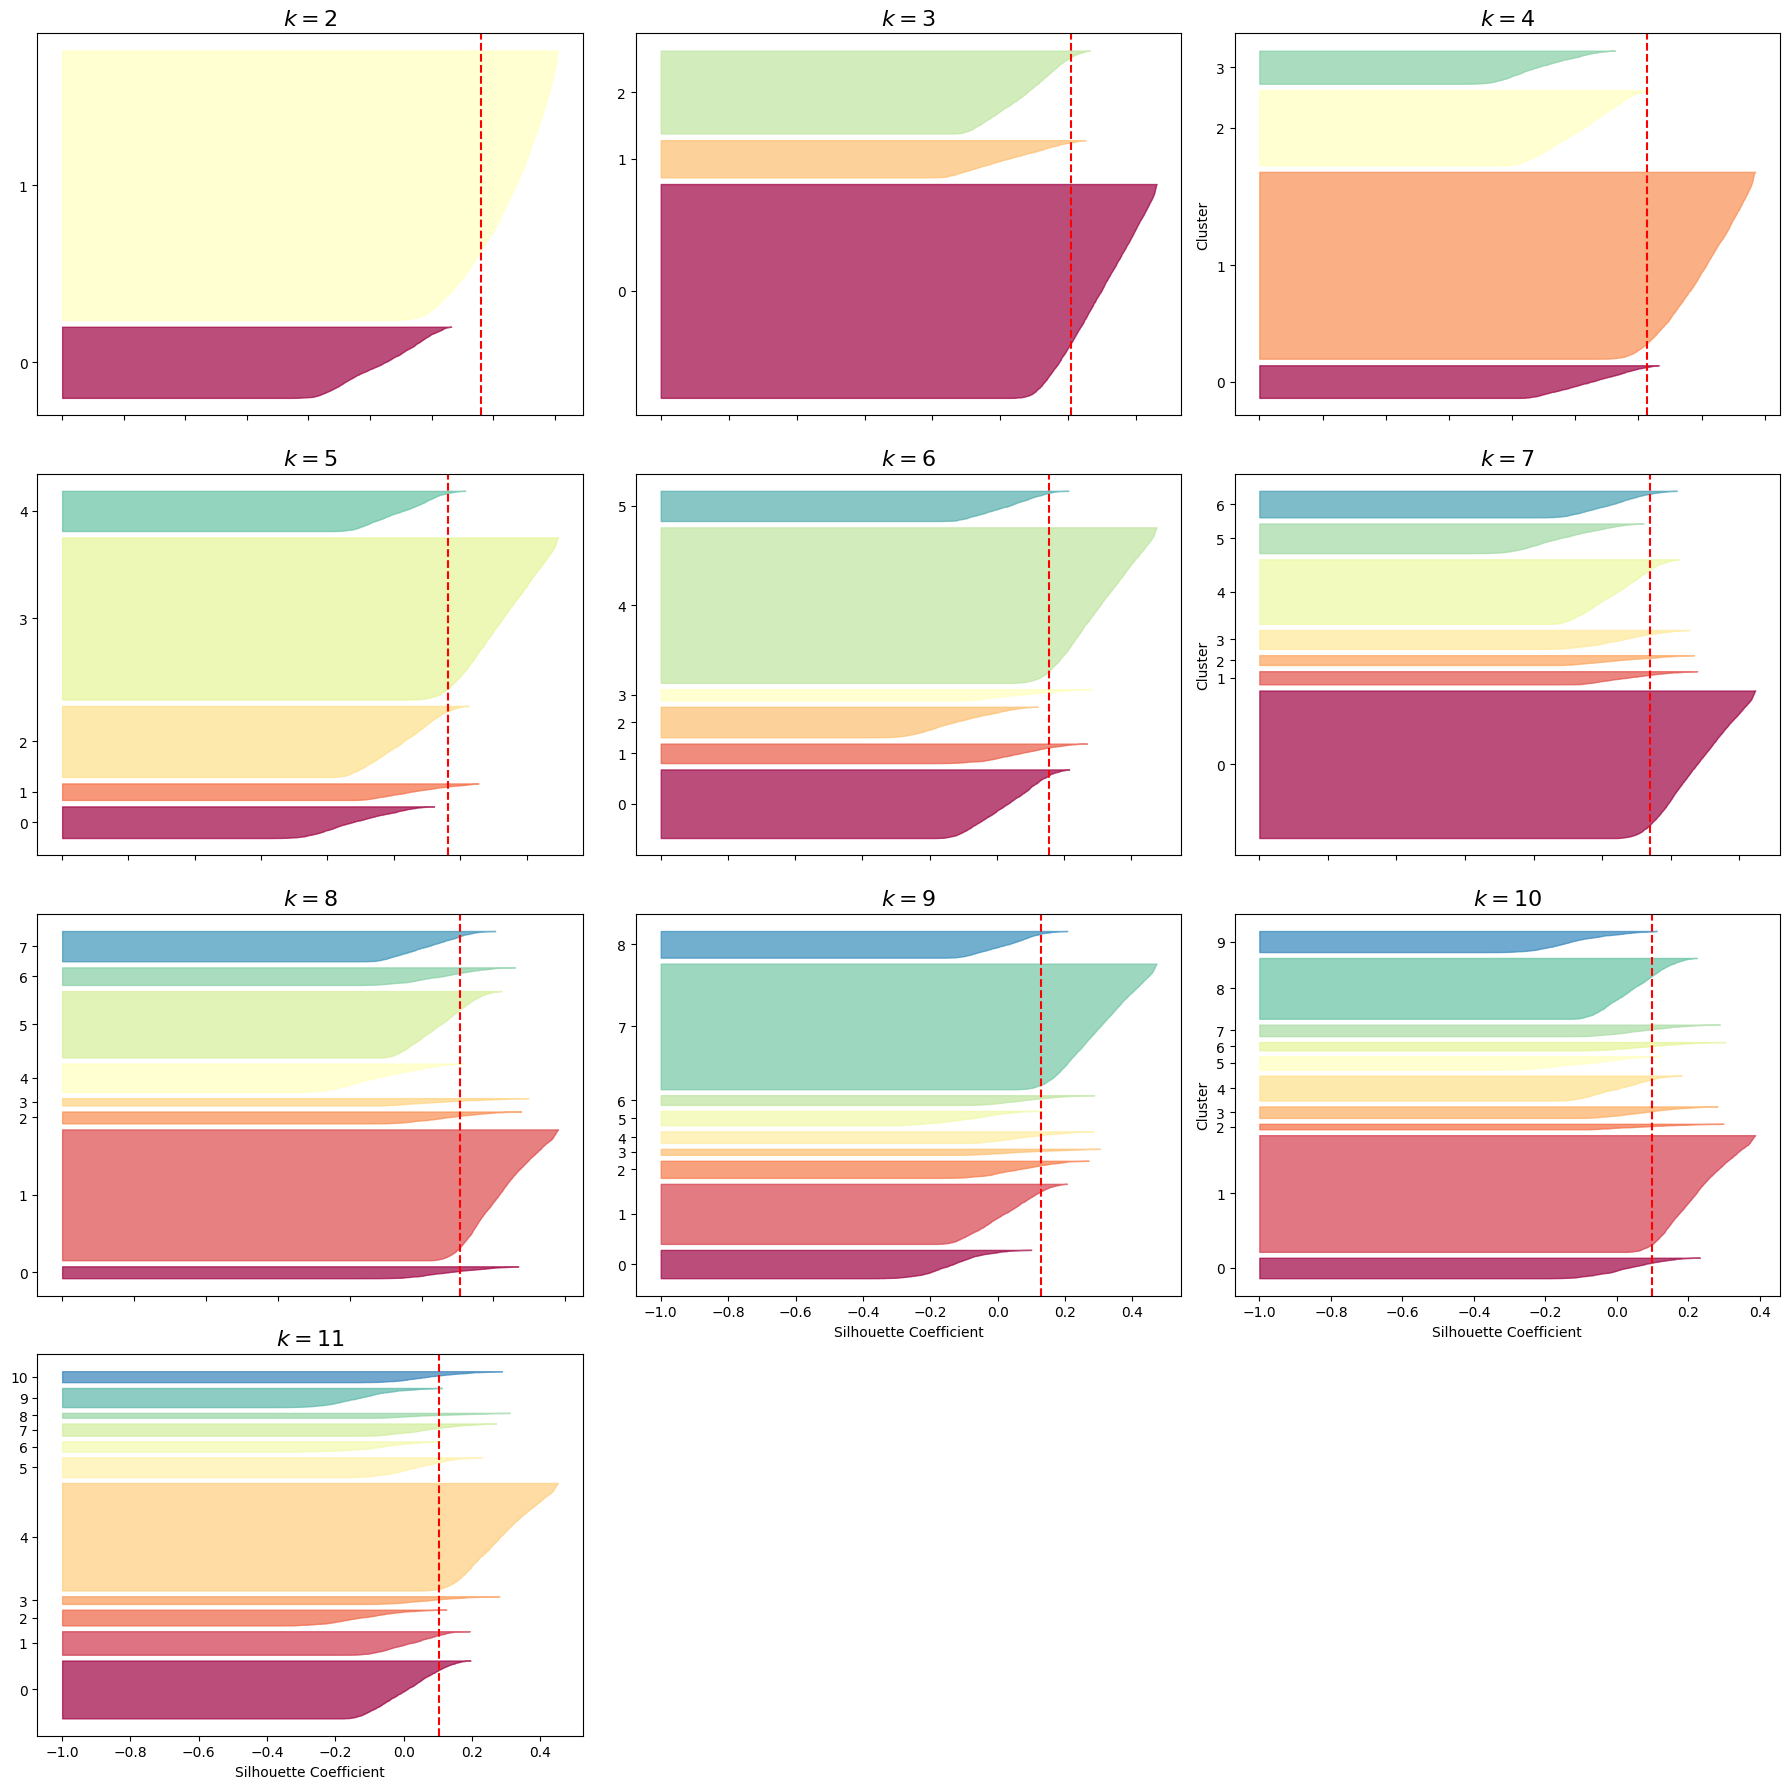

In [22]:
plt.figure(figsize=(18, 18))

# Ajustar el número de filas y columnas para que se ajusten todos los subgráficos
n_rows = 4
n_cols = 3

for k in range(2, 12):
    plt.subplot(n_rows, n_cols, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), -1, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k % n_cols == 1:
        plt.ylabel("Cluster")

    if k > 8:
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

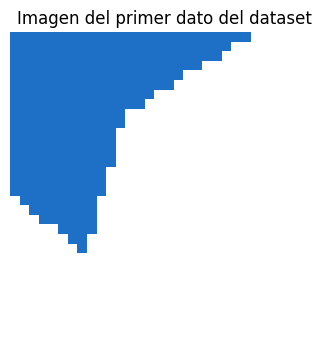

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame df_train con los datos

# Obtener el primer dato del DataFrame
primer_dato = df_train.iloc[0]

# Convertir el primer dato a una matriz 3D de dimensiones 32x32x3 y normalizar
imagen = np.array(primer_dato).reshape(32, 32, 3) / 255.0  # Normalizar dividiendo por 255.0

# Mostrar la imagen utilizando Matplotlib
plt.figure(figsize=(4, 4))  # Ajusta el tamaño de la figura según sea necesario
plt.imshow(imagen)
plt.axis('off')  # Oculta los ejes
plt.title('Imagen del primer dato del dataset')
plt.show()


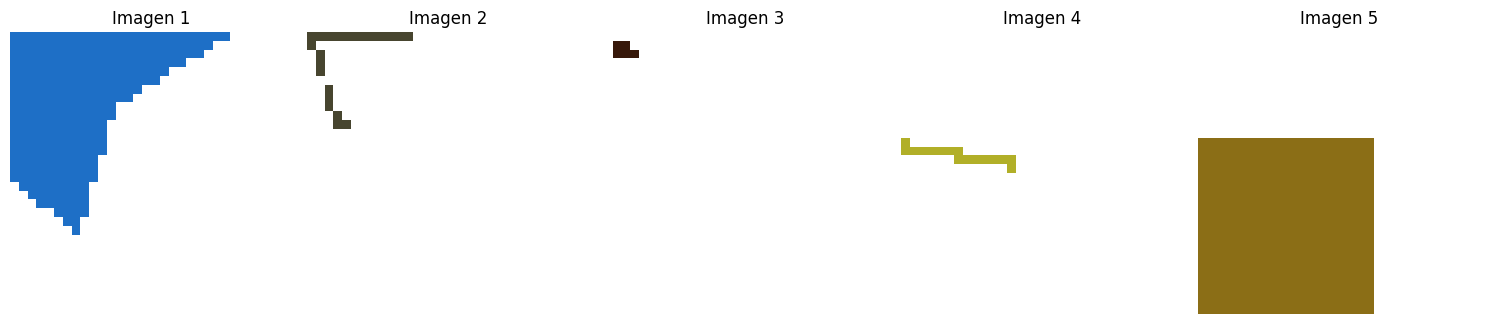

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame df_train con los datos

# Obtener los 5 primeros datos del DataFrame
primeros_datos = df_train.iloc[:5]

# Crear una figura con subplots de tamaño adecuado
fig, axes = plt.subplots(1, 5, figsize=(15, 12))  # 4 filas y 5 columnas

# Iterar sobre los primeros 20 datos y graficarlos
for i, ax in enumerate(axes.flat):
    # Convertir cada dato a una matriz 3D de dimensiones 32x32x3 y normalizar
    imagen = np.array(primeros_datos.iloc[i]).reshape(32, 32, 3) / 255.0  # Normalizar dividiendo por 255.0

    # Mostrar la imagen en el subplot correspondiente
    ax.imshow(imagen)
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f'Imagen {i+1}')  # Título con el número de la imagen

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura con todas las imágenes
plt.show()
